In [1]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt
 import warnings
warnings.filterwarnings('ignore')

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (8425, 23)

The column headers in the dataset: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Date,0,0.00
Location,0,0.00
MinTemp,75,0.89
MaxTemp,60,0.71
Rainfall,240,2.85
Evaporation,3512,41.69
Sunshine,3994,47.41
WindGustDir,991,11.76
WindGustSpeed,991,11.76
WindDir9am,829,9.84


In [7]:
# List of the columns with NO missing values
missing_val[missing_val['Null values'] == 0]

,Null values,% of missing
Date,0,0.0
Location,0,0.0


In [8]:
# Storing only the columns with missing values
missing_val = missing_val[missing_val['Null values'] > 0].sort_values(by='% of missing', ascending=False)
missing_val

,Null values,% of missing
Sunshine,3994,47.41
Evaporation,3512,41.69
Cloud3pm,2455,29.14
Cloud9am,2421,28.74
Pressure3pm,1312,15.57
Pressure9am,1309,15.54
WindGustDir,991,11.76
WindGustSpeed,991,11.76
WindDir9am,829,9.84
WindDir3pm,308,3.66


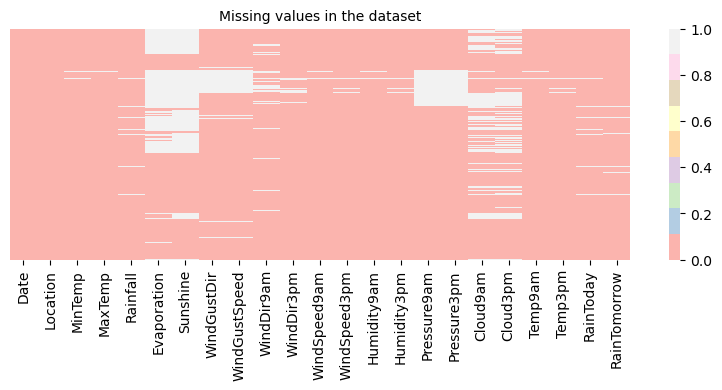

In [9]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Pastel1')
plt.title('Missing values in the dataset', fontsize=10);

In [10]:
# Create a mask for rows where all specified columns have missing values
missing_values_col = missing_val.index.to_list()
mask = df[missing_values_col].isnull().all(axis=1)

# Use the mask to filter the DataFrame and get rows with all missing values
rows_with_all_missing = df[mask]

# Display the resulting rows
print(f"Columns with missing values: \n{missing_values_col} \n\nNumber of rows with null values in almost all columns: {rows_with_all_missing.shape[0]}")
print(f"This represent {round(rows_with_all_missing.shape[0] / df.shape[0] *100, 2)}% of the data.\n")
print("Rows with null values:")
rows_with_all_missing 

Columns with missing values: 
['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure3pm', 'Pressure9am', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Rainfall', 'RainToday', 'RainTomorrow', 'WindSpeed3pm', 'Humidity3pm', 'Temp3pm', 'WindSpeed9am', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Temp9am'] 

Number of rows with null values in almost all columns: 9
This represent 0.11% of the data.

Rows with null values:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1813,2014-03-31,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,2014-04-01,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,2014-04-02,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,2014-04-03,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,2014-04-04,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,2015-03-17,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,2015-03-18,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,2015-03-19,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,2015-04-21,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping the rows with missing values in almost all columns
df = df[~mask]
print(f"The new dimension of the dataset is {df.shape}")

The new dimension of the dataset is (8416, 23)


In [12]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

,No. of unique values,type
Date,3004,object
Location,12,object
MinTemp,285,float64
MaxTemp,331,float64
Rainfall,250,float64
Evaporation,116,float64
Sunshine,140,float64
WindGustDir,16,object
WindGustSpeed,52,float64
WindDir9am,16,object


In [13]:
# Inspect the unique values of the target variable
column = 'Rainfall'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Rainfall:
Rainfall
0.0      5299
0.2       406
NaN       231
0.4       177
0.6       116
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: count, Length: 251, dtype: int64
Unique values: [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.2, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 2.9, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.5, 5.6, 6.2, 6.3, 7.4, 7.6, 8.7, 8.8, 9.0, 9.2, 9.4, 9.6, 10.0, 10.8, 11.2, 11.4, 11.8, 12.0, 12.2, 12.8, 13.0, 13.2, 13.6, 13.8, 14.0, 14.2, 14.6, 14.8, 15.0, 15.2, 15.4, 15.6, nan, 3.0, 5.8, 6.0, 6.4, 6.6, 6.8, 7.0, 7.2, 7.8, 8.0, 8.2, 8.4, 8.6, 9.8, 10.2, 10.4, 10.6, 11.0, 11.6, 12.4, 12.6, 13.4, 14.4, 15.7, 15.8, 16.0, 16.2, 16.4, 16.6, 16.8, 17.0, 17.2, 17.4, 17.6, 17.8, 18.0, 18.1, 18.2, 18.4, 18.6, 18.8, 19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22.4, 22.5, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.4,

In [14]:
print(f"% of zeros in {column} column is {df[column].value_counts(normalize=True)[0]*100:.2f}%")

% of zeros in Rainfall column is 64.74%


In [15]:
# Inspect the unique values of the target variable
column = 'RainTomorrow'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature RainTomorrow:
RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64
Unique values: ['No' 'Yes' nan]
# unique values: 2


In [16]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
Date
2011-01-27    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-27    1
2013-01-28    1
2013-01-29    1
2013-01-30    1
2014-04-04    1
Name: count, Length: 3004, dtype: int64


In [17]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [19]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []
datetime_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    elif df.dtypes[i] == 'datetime64[ns]': 
        print(df.dtypes[i])
        datetime_col.append(i)
    else:
        numerical_col.append(i)

# Put the target variable at the end
numerical_col.remove('Rainfall')
numerical_col = numerical_col + ['Rainfall']

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")
print(f"Datetime Columns:\n {datetime_col}\n")

datetime64[ns]
Categorical Columns:
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical Columns:
 ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Rainfall']

Datetime Columns:
 ['Date']



In [20]:
for i, column in enumerate(categorical_col[:-1]):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Location:
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        813
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64
# unique values: 12

2.Feature WindGustDir:
WindGustDir
NaN    982
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: count, dtype: int64
# unique values: 16

3.Feature WindDir9am:
WindDir9am
N      906
NaN    820
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: count, dtype: int64
# unique values: 16

4.Feature WindDir3pm:
WindDir3pm
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
ESE 

In [21]:
for i, column in enumerate(numerical_col[:-1]):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature MinTemp:
MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: count, Length: 285, dtype: int64
# unique values: 285

2.Feature MaxTemp:
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: count, Length: 331, dtype: int64
# unique values: 331

3.Feature Evaporation:
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: count, Length: 116, dtype: int64
# unique values: 116

4.Feature Sunshine:
Sunshine
0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: count, Length: 140, dtype: int64
# unique values: 140

5.Feature WindGustSpeed:
WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0

In [22]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8416,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,2012-08-04 14:42:22.585551360,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
min,2008-12-01 00:00:00,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,2010-07-13 00:00:00,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,2011-12-23 00:00:00,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,2014-09-11 00:00:00,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,2017-06-25 00:00:00,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000
std,NaN,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020


In [23]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8416,8416,7434,7596,8117,8185,8186
unique,NaN,12,16,16,16,2,2
top,NaN,Melbourne,N,N,SE,No,No
freq,NaN,1622,713,906,813,6195,6195
mean,2012-08-04 14:42:22.585551360,NaN,NaN,NaN,NaN,NaN,NaN
min,2008-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2010-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014-09-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

TypeError: '<' not supported between instances of 'Timedelta' and 'numpy.float64'

In [25]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Rainfall         347.275329
Evaporation      129.521636
WindSpeed3pm      44.932365
WindGustSpeed     37.494089
WindSpeed9am      28.803195
Humidity3pm       10.902663
Temp9am           10.383915
Temp3pm            9.697025
MaxTemp            9.367208
Pressure9am        7.702368
Pressure3pm        7.230564
MinTemp            4.499502
Humidity9am       -1.489061
Sunshine          -1.524674
Cloud3pm            -1.9665
Cloud9am          -2.321939
Date                    NaN
dtype: object

In [26]:

# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 1663 duplicate rows, which represent 19.760% of the data.


In [27]:
# Remove duplicates across all columns
df = df.drop_duplicates()
print(f"The dimension of the dataset, after drop duplicates, is {df.shape}")

The dimension of the dataset, after drop duplicates, is (6753, 23)


In [28]:
# Checking duplicated rows the same date and location.
df[df.duplicated(['Date','Location'])]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


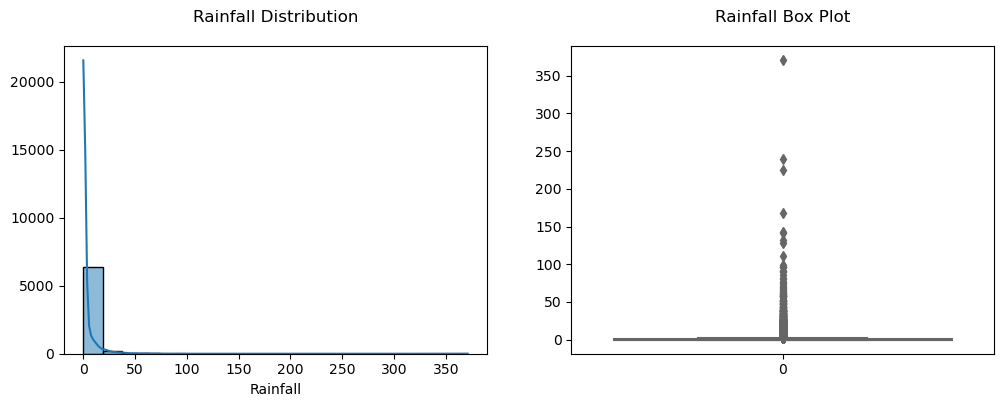

Skewness of Rainfall : 13.510350036642718


In [29]:
#Visualize target distribution
col = 'Rainfall'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Rainfall is skewed to the right and presents a high percentage of zeros. There are outliers present in the Box plot.

In [30]:
# Distribution of RainTomorrow
df['RainTomorrow'].value_counts().to_frame()

,count
RainTomorrow,
No,5052
Yes,1572


In [31]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

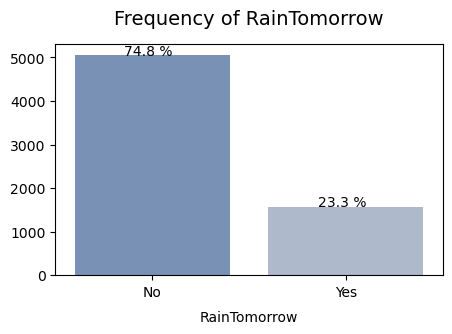

In [32]:
# Set the custom palette
sns.set_palette('vlag')

# Visualize the frequency of RainTomorrow
col = 'RainTomorrow'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [33]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}. {col}")

1. Location
2. WindGustDir
3. WindDir9am
4. WindDir3pm
5. RainToday


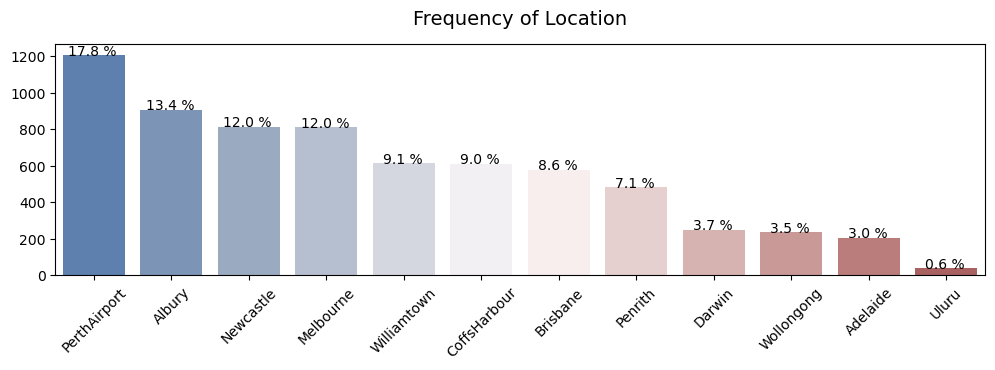

In [34]:
# Visualize the frequency of Location(1)
col = 'Location'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [35]:
wind_dir_cat = {'N': 'North',
                'NNE': 'North-Northeast',
                'NE': 'Northeast',
                'ENE': 'East-Northeast',
                'E': 'East',
                'ESE': 'East-Southeast',
                'SE': 'Southeast',
                'SSE': 'South-Southeast',
                'S': 'South',
                'SSW': 'South-Southwest',
                'SW': 'Southwest',
                'WSW': 'West-Southwest',
                'W': 'West',
                'WNW': 'West-Northwest',
                'NW': 'Northwest',
                'NNW': 'North-Northwest' }

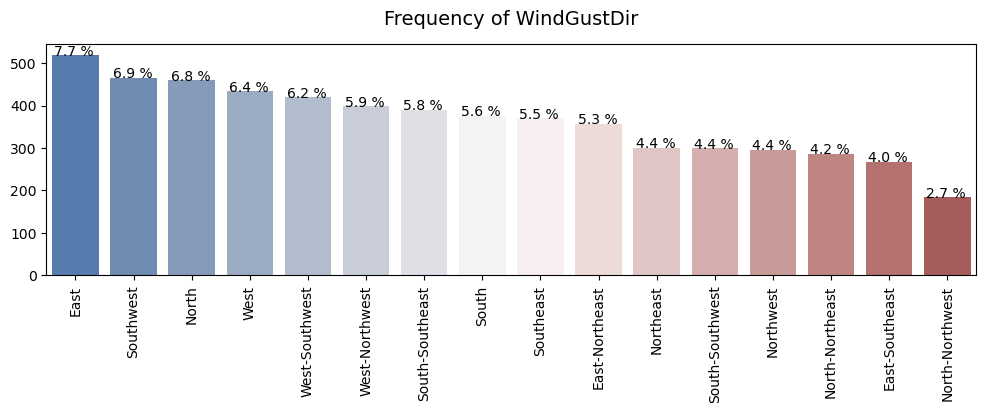

In [36]:
# Visualize the frequency of WindGustDir(2)
col = 'WindGustDir'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

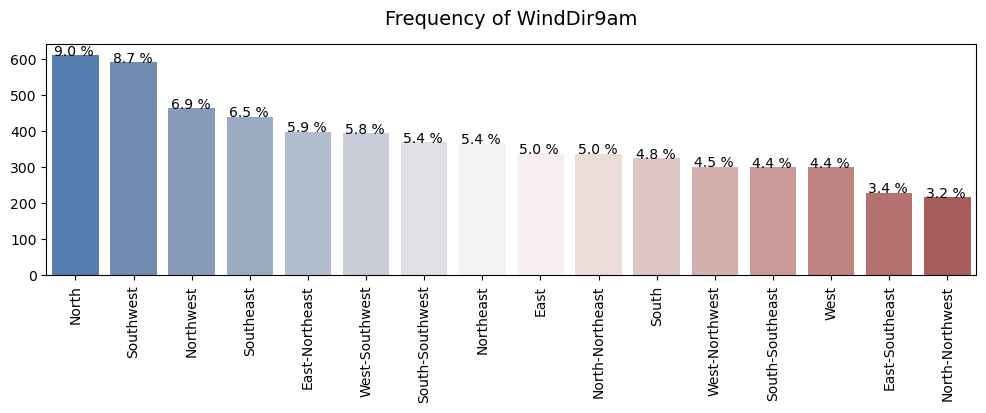

In [37]:
# Visualize the frequency of WindDir9am(3)
col = 'WindDir9am'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

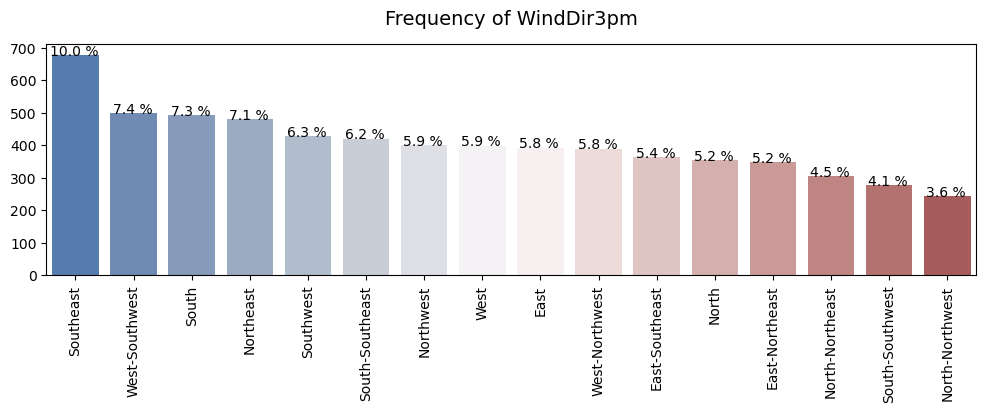

In [38]:
# Visualize the frequency of WindDir3pm(4)
col = 'WindDir3pm'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

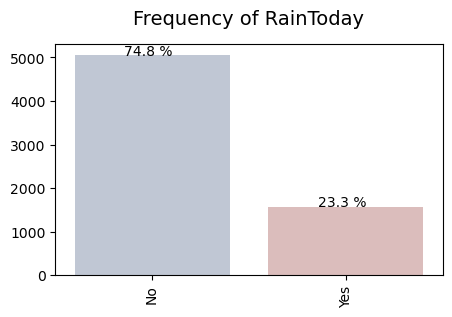

In [39]:
# Visualize the frequency of RainToday(5)
col = 'RainToday'
plt.figure(figsize=(5, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [40]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col[:-1]):
    print(f"{i+1}. {col}")

1. MinTemp
2. MaxTemp
3. Evaporation
4. Sunshine
5. WindGustSpeed
6. WindSpeed9am
7. WindSpeed3pm
8. Humidity9am
9. Humidity3pm
10. Pressure9am
11. Pressure3pm
12. Cloud9am
13. Cloud3pm
14. Temp9am
15. Temp3pm


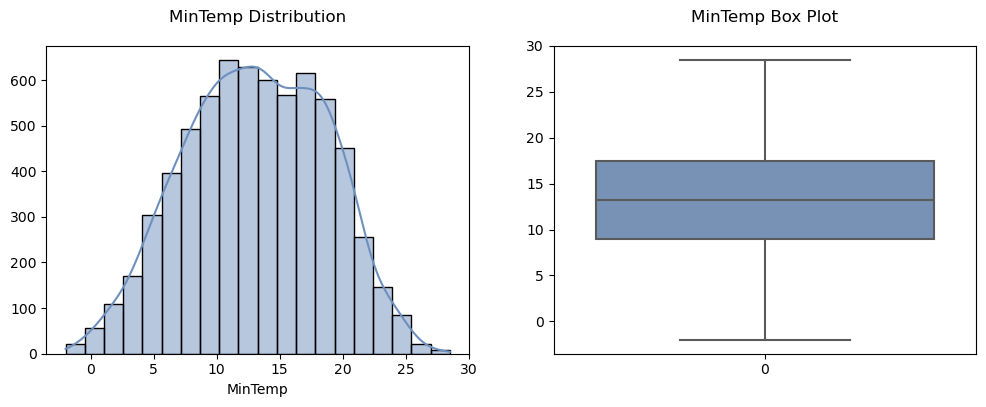

Skewness of MinTemp : -0.08327137996747112


In [41]:
#Visualize (1) MinTemp
col = 'MinTemp'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

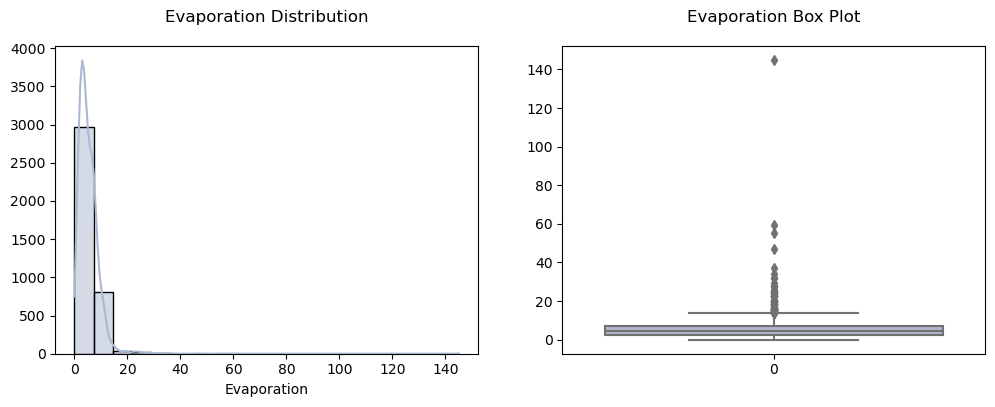

Skewness of Evaporation : 10.216569932129818


In [42]:
#Visualize (3) Evaporation
col = 'Evaporation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Evaporation
print(f"Skewness of {col} : {df[col].skew()}")

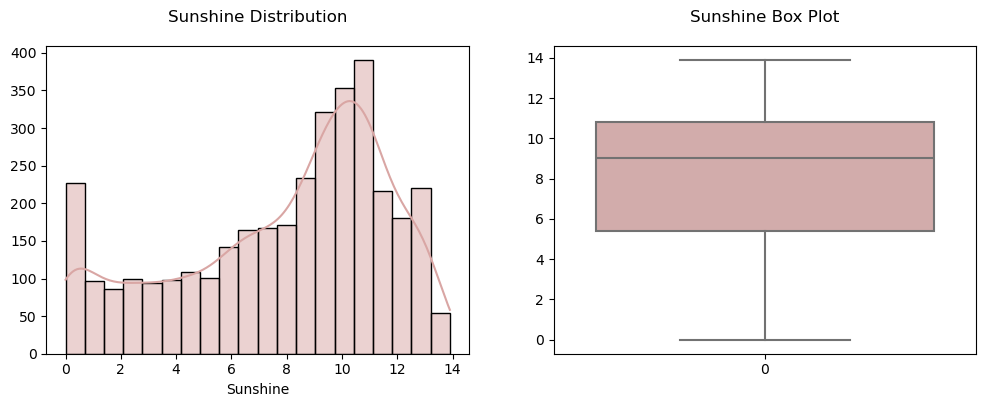

Skewness of Sunshine : -0.6371369042547046


In [43]:
#Visualize (4) Sunshine
col = 'Sunshine'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#d9a6a4')
sns.boxplot(df[col], ax=axes[1], color='#d9a6a4')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Sunshine
print(f"Skewness of {col} : {df[col].skew()}")

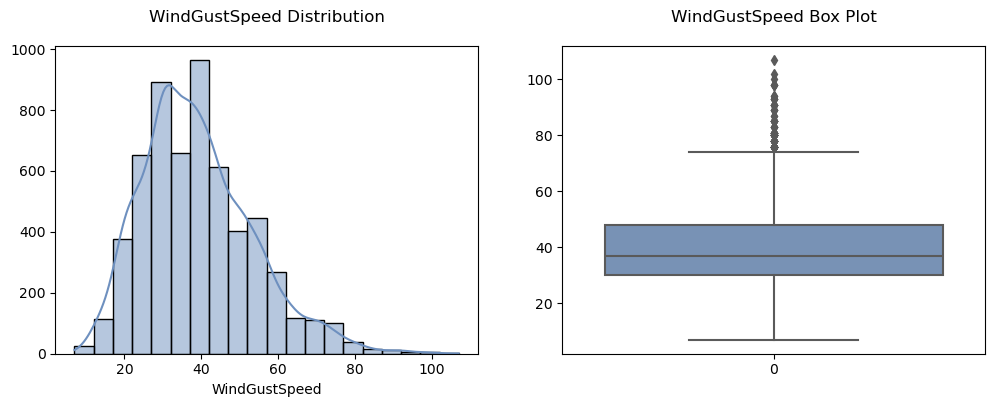

Skewness of WindGustSpeed : 0.7240650794121386


In [44]:
#Visualize (5) WindGustSpeed
col = 'WindGustSpeed'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total WindGustSpeed
print(f"Skewness of {col} : {df[col].skew()}")

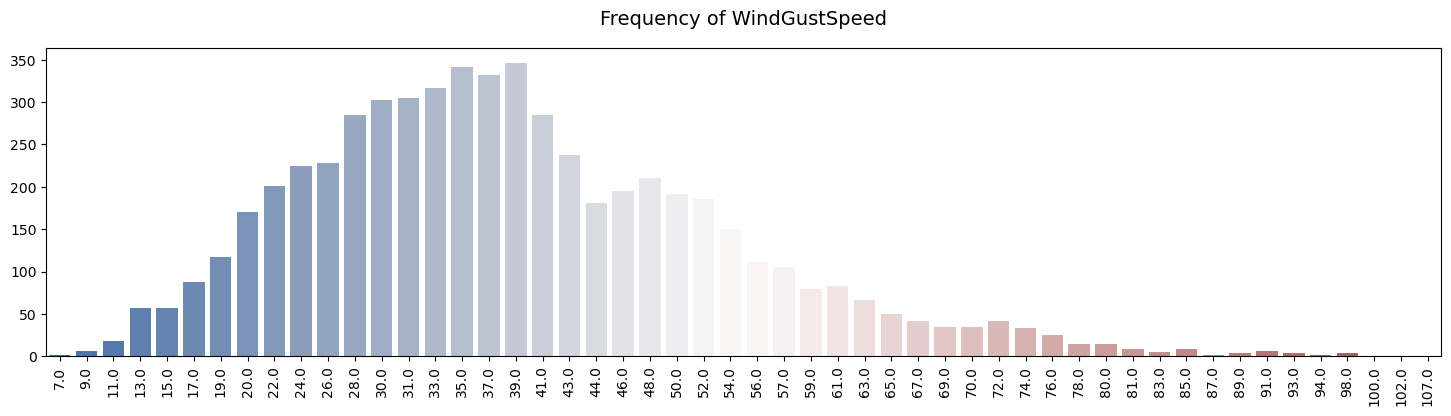

In [45]:
# Visualize the frequency of WindGustSpeed
column = 'WindGustSpeed'
plt.figure(figsize=(18, 4))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

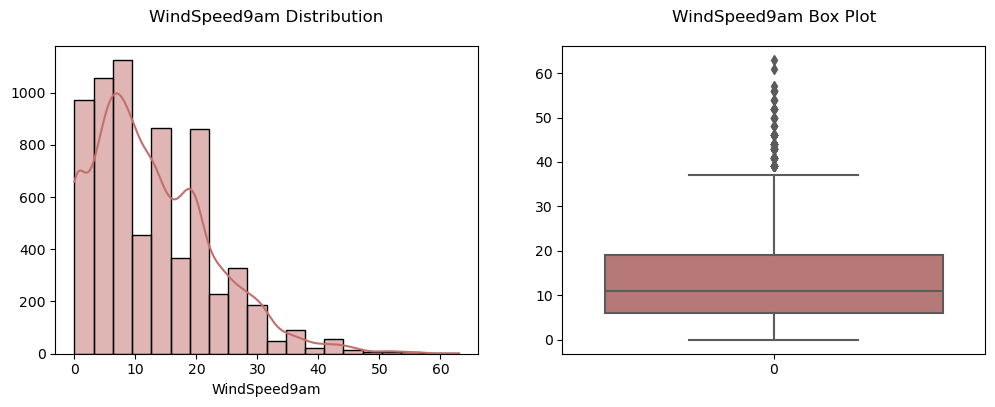

Skewness of WindSpeed9am : 0.9525689961936727


In [46]:
#Visualize (6) WindSpeed9am
col = 'WindSpeed9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of WindSpeed9am
print(f"Skewness of {col} : {df[col].skew()}")

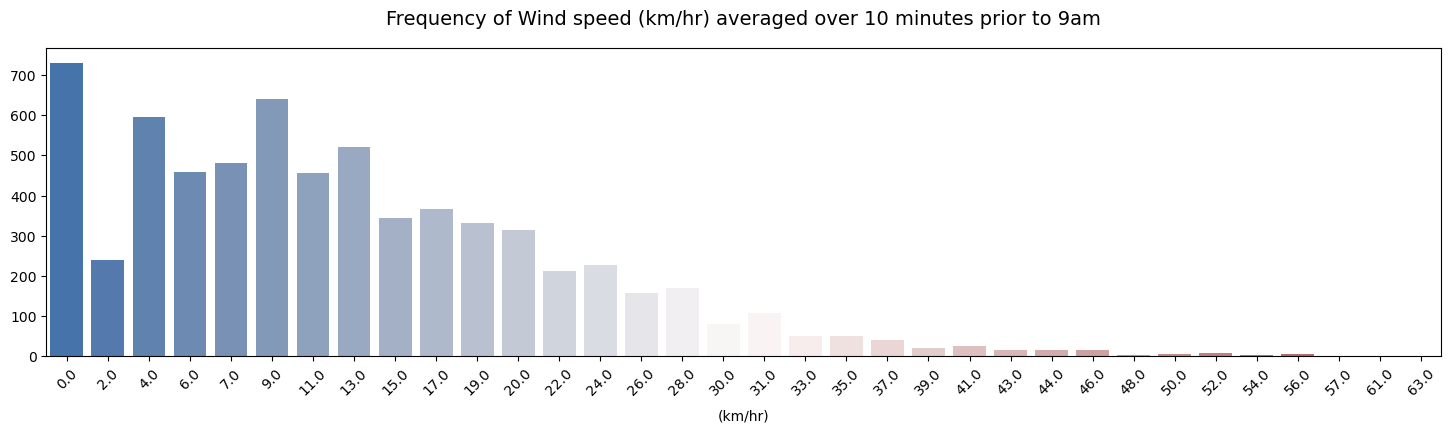

In [47]:
# Visualize the frequency of WindSpeed9am 
column = 'WindSpeed9am'
plt.figure(figsize=(18, 4))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=45)
plt.xlabel('(km/hr)', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Wind speed (km/hr) averaged over 10 minutes prior to 9am", size=14, y=1.05);

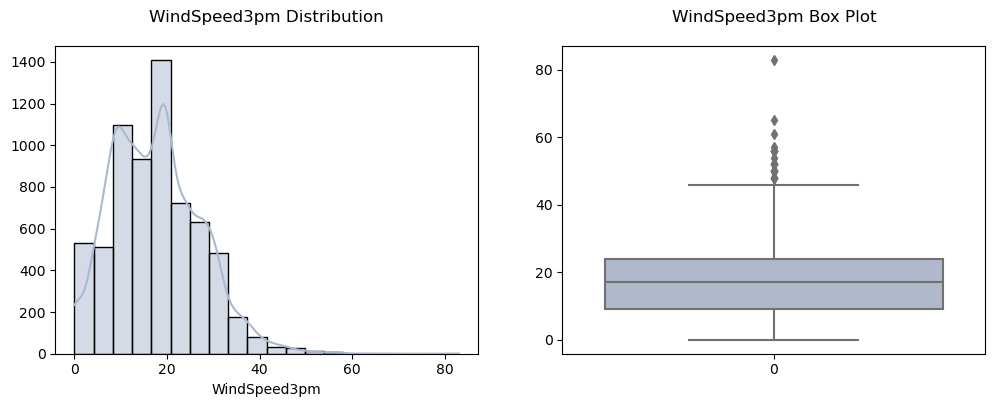

Skewness of WindSpeed3pm : 0.5457184444221408


In [48]:
#Visualize (7) WindSpeed3pm
col = 'WindSpeed3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of WindSpeed3pm
print(f"Skewness of {col} : {df[col].skew()}")

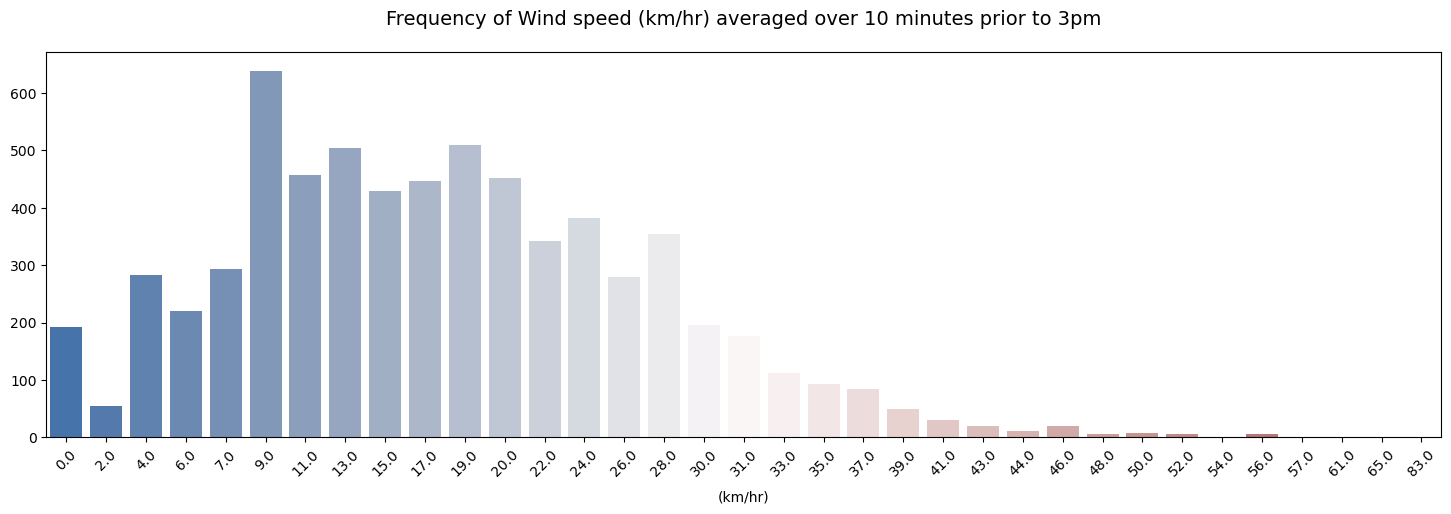

In [49]:
# Visualize the frequency of WindSpeed3pm 
column = 'WindSpeed3pm'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=45)
plt.xlabel('(km/hr)', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Wind speed (km/hr) averaged over 10 minutes prior to 3pm", size=14, y=1.05);

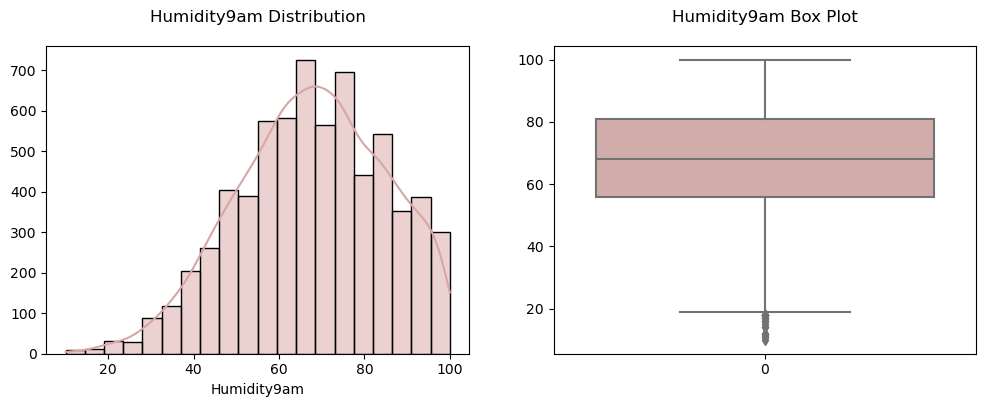

Skewness of Humidity9am : -0.2551524572296424


In [50]:
#Visualize (8) Humidity9am
col = 'Humidity9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#d9a6a4')
sns.boxplot(df[col], ax=axes[1], color='#d9a6a4')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Humidity9am
print(f"Skewness of {col} : {df[col].skew()}")

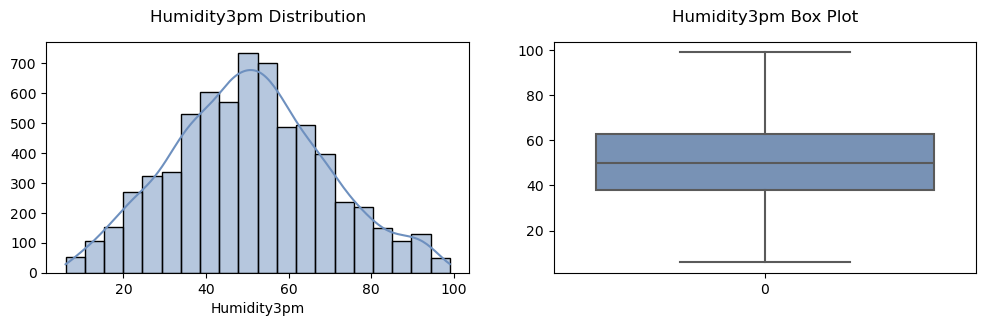

Skewness of Humidity3pm : 0.14978550603236443


In [51]:
#Visualize (9) Humidity3pm
col = 'Humidity3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Humidity3pm
print(f"Skewness of {col} : {df[col].skew()}")

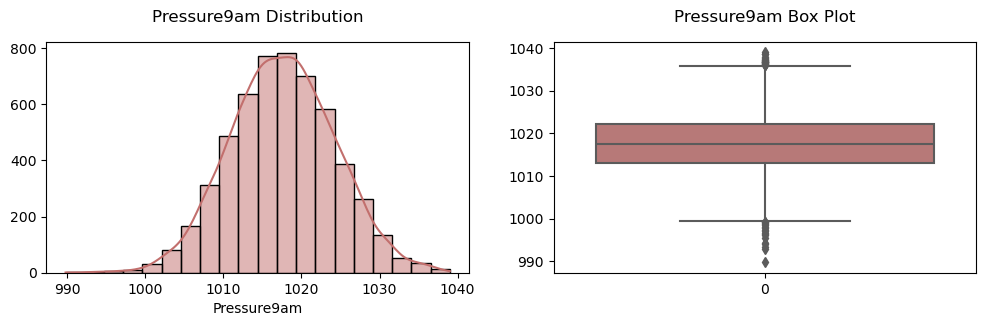

Skewness of Pressure9am : 0.01983565576153915


In [52]:
#Visualize (10) Pressure9am
col = 'Pressure9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Pressure9am
print(f"Skewness of {col} : {df[col].skew()}")

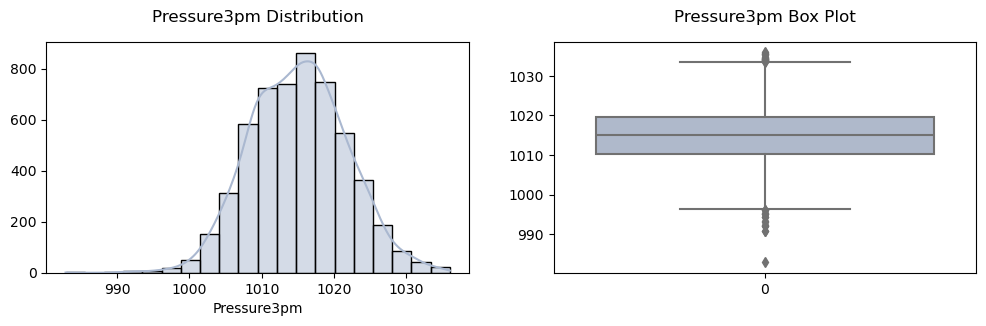

Skewness of Pressure3pm : 0.038600734103795574


In [53]:
#Visualize (11) Pressure3pm
col = 'Pressure3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Pressure3pm
print(f"Skewness of {col} : {df[col].skew()}")

ValueError: Invalid RGBA argument: '#policy_state'

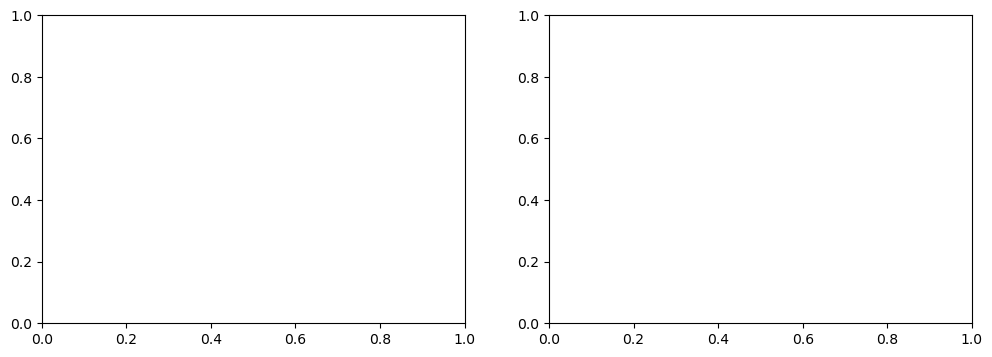

In [54]:
#Visualize (12) Cloud9am
col = 'Cloud9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=5, ax=axes[0], color='#policy_state')
sns.boxplot(df[col], ax=axes[1], color='#d9a6a4')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Cloud9am
print(f"Skewness of {col} : {df[col].skew()}")

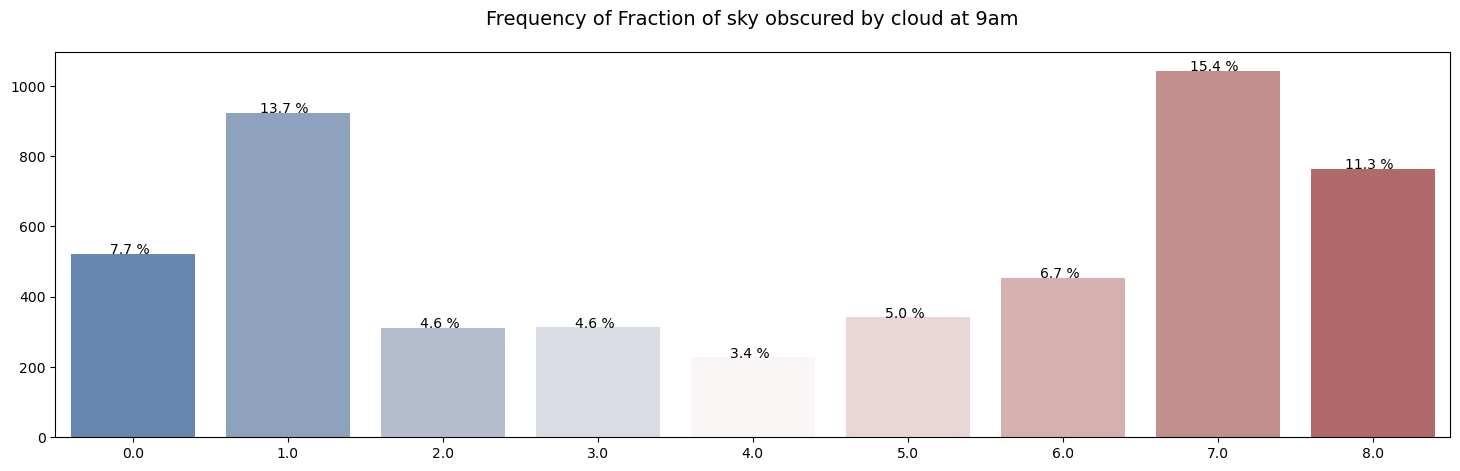

In [55]:
# Visualize the frequency of Cloud9am (3)
column = 'Cloud9am'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Fraction of sky obscured by cloud at 9am", size=14, y=1.05);

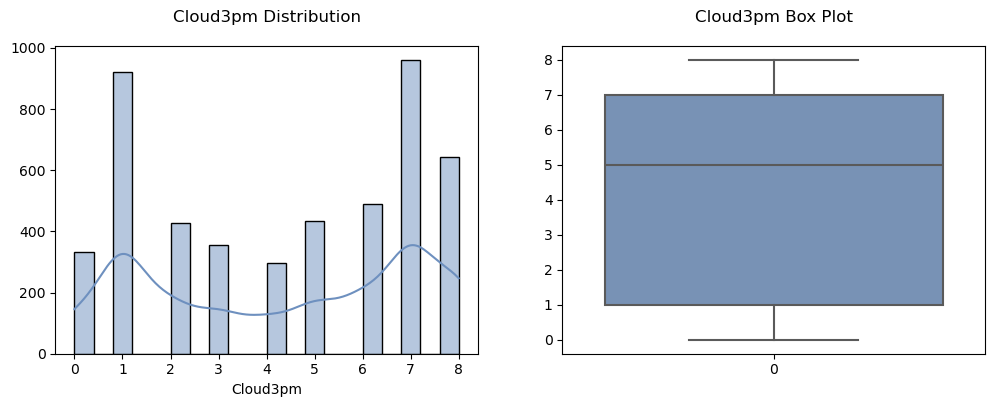

Skewness of Cloud3pm : -0.13748605707196723


In [56]:
#Visualize (13) Cloud3pm
col = 'Cloud3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total Cloud3pm
print(f"Skewness of {col} : {df[col].skew()}")

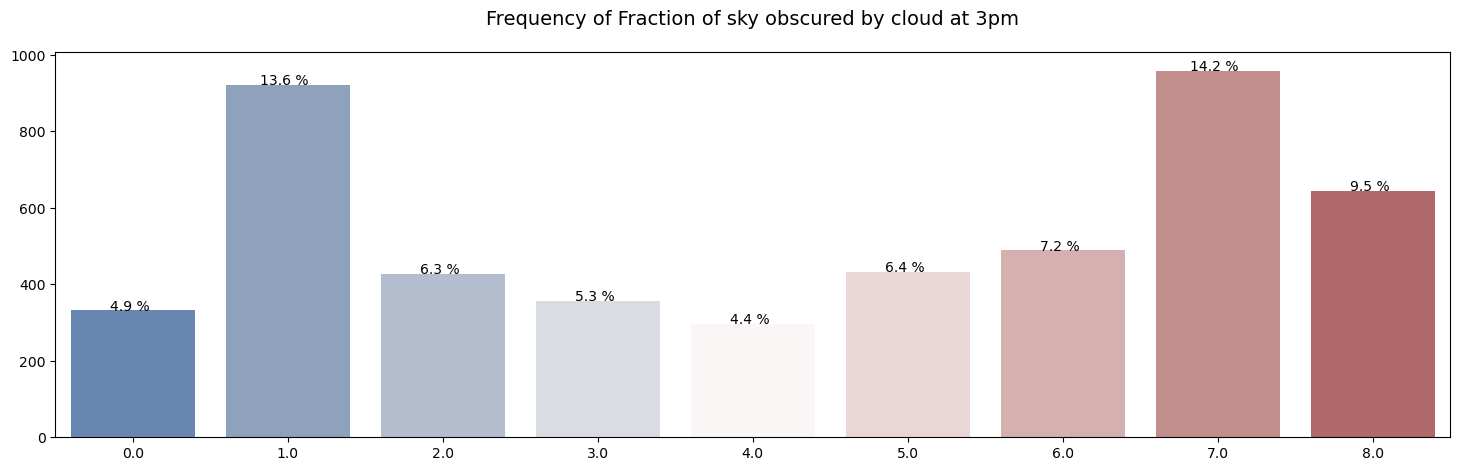

In [57]:
# Visualize the frequency of Cloud3pm
column = 'Cloud3pm'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Fraction of sky obscured by cloud at 3pm", size=14, y=1.05);

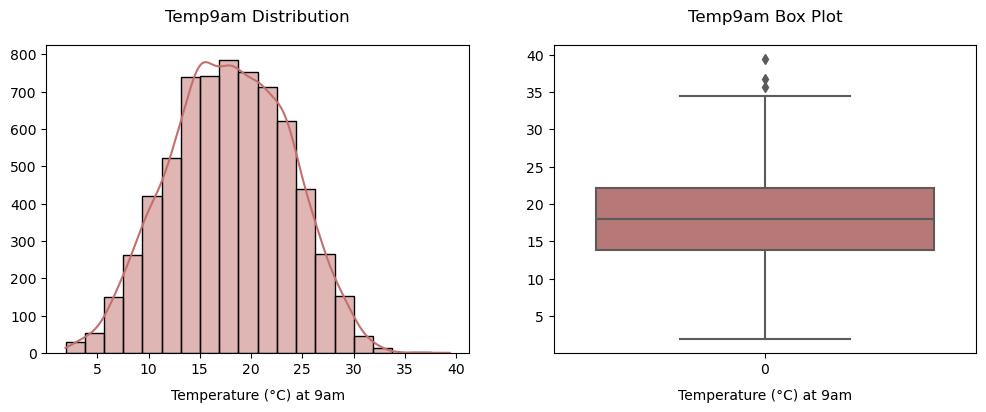

Skewness of Temp9am : -0.04703426366372244


In [58]:
#Visualize (14) Temp9am
col = 'Temp9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('Temperature (°C) at 9am', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].set_xlabel('Temperature (°C) at 9am', size=10, labelpad=8)

plt.show()

# Show the skewness of Temp9am
print(f"Skewness of {col} : {df[col].skew()}")

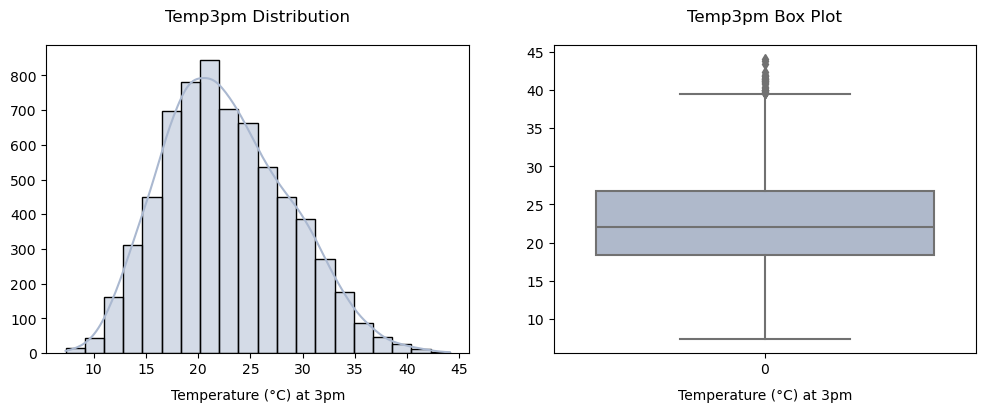

Skewness of Temp3pm : 0.3457252613504707


In [59]:
#Visualize (15) Temp3pm
col = 'Temp3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('Temperature (°C) at 3pm', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].set_xlabel('Temperature (°C) at 3pm', size=10, labelpad=8)

plt.show()

# Show the skewness of Temp3pm
print(f"Skewness of {col} : {df[col].skew()}")

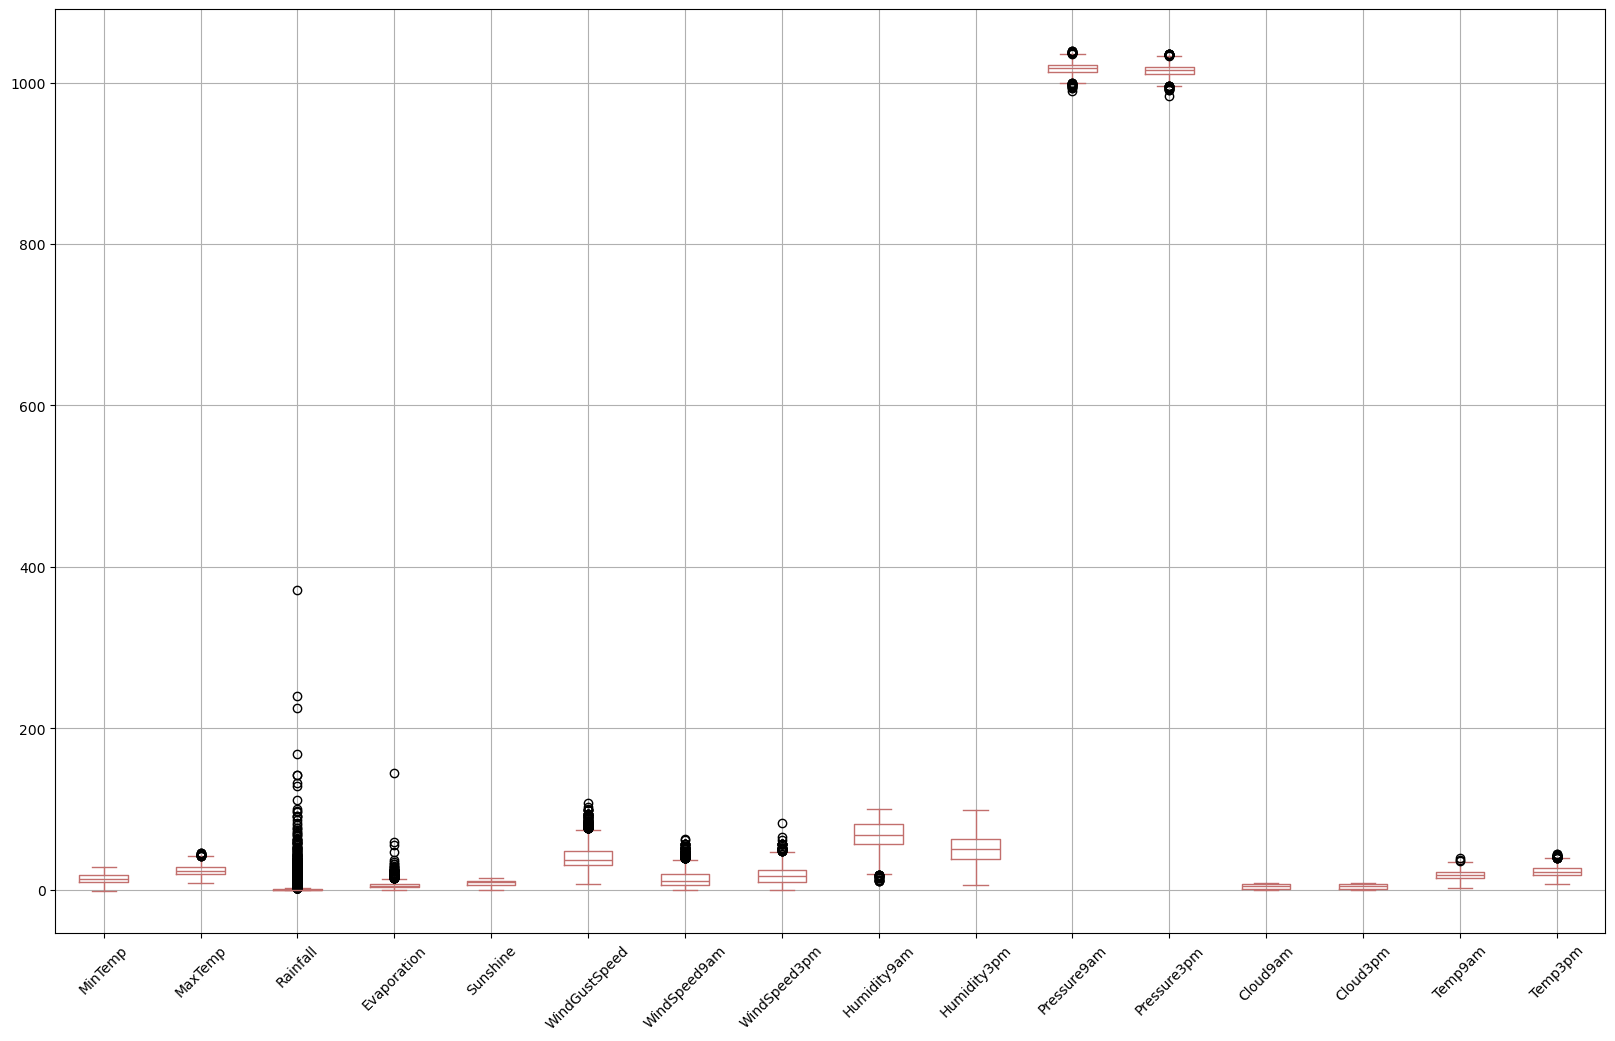

In [60]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

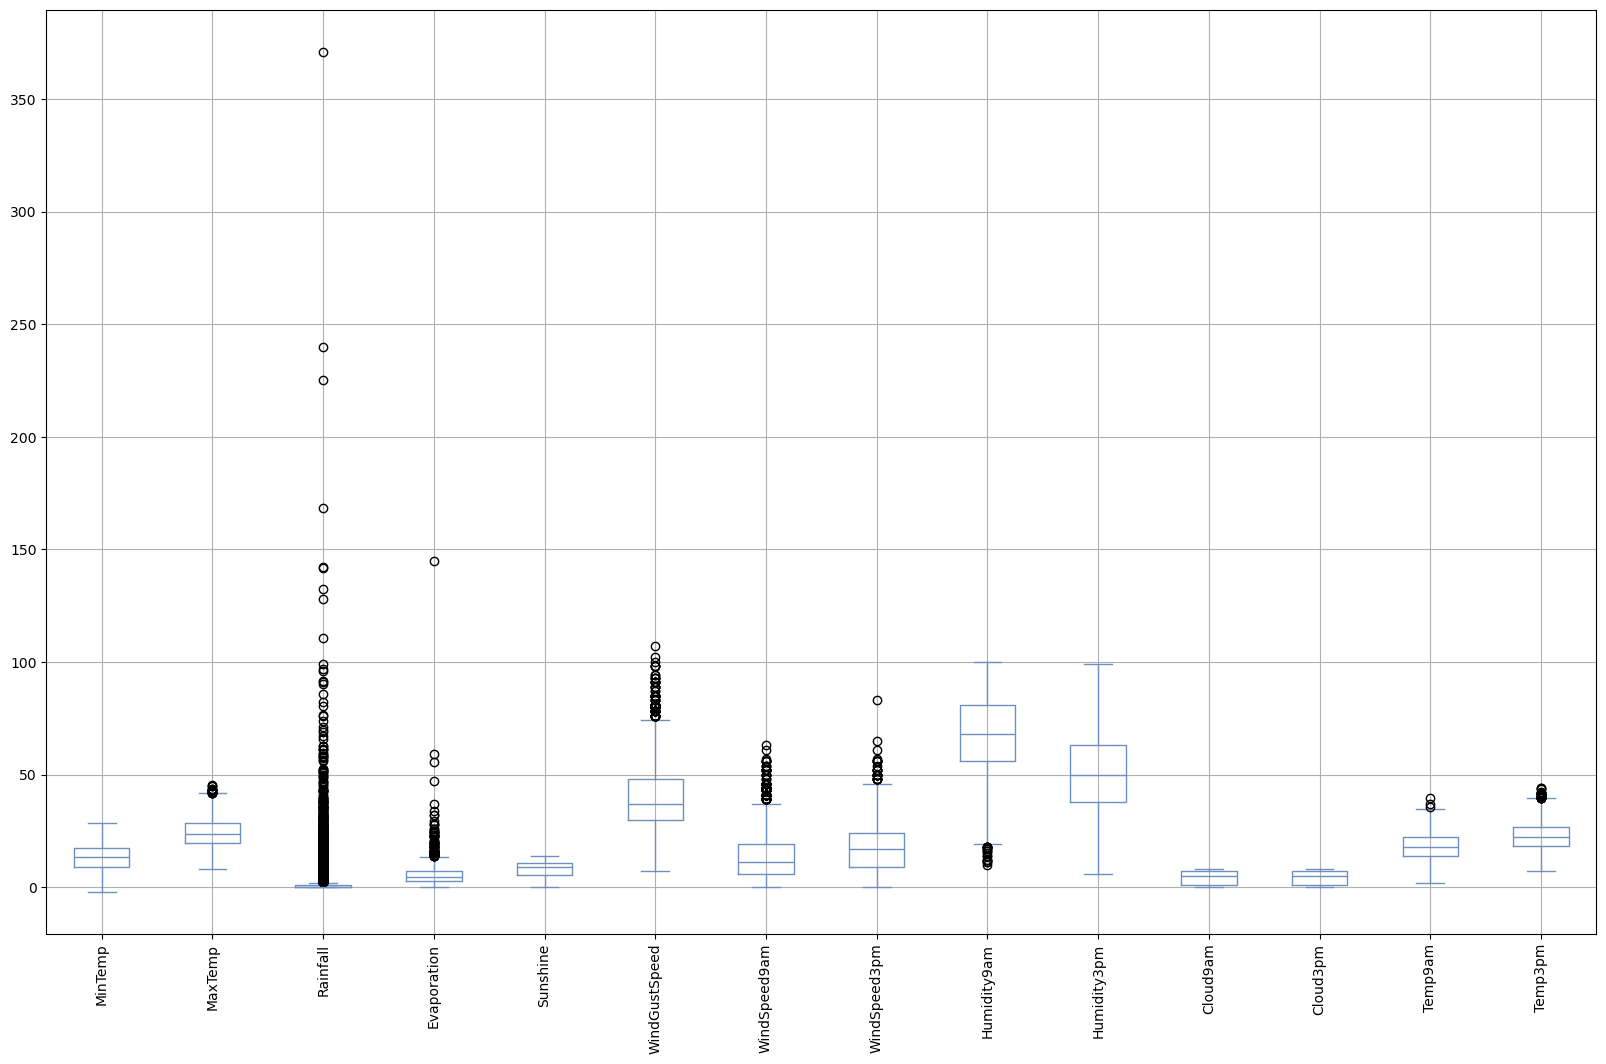

In [61]:
# Draw a boxplot for each independent variable 
df.drop(['Pressure9am', 'Pressure3pm'], axis=1).boxplot(figsize=(20,12), color='#6e90bf')
plt.xticks(rotation=90)
plt.show()

 Preprocesing Date column

In [62]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [63]:
# Group by Location, year, month, and RainTomorrow, and calculate the mean for each numeric column.
average_by_month_year = df.groupby(['Location','year', 'month','RainTomorrow'], as_index=False).mean()
average_by_month_year['Date'] = pd.to_datetime(average_by_month_year[['year', 'month']].assign(day=1))

# Drop the day(mean) column that is no needed 
average_by_month_year.drop('day', axis=1, inplace=True)
average_by_month_year

TypeError: agg function failed [how->mean,dtype->object]

In [65]:
# Define the function that plot two features <cols> over the time 
def plot_comparing_features_over_time(cols, data, labels, colors, title, xlabel, ylabel, figsize):
    '''Define the function that plot the feature <col> by <category_col> over the time '''

    # Style settings
    sns.set_style('whitegrid')
    sns.set(font_scale=1.5)  
    plt.figure(figsize=figsize)

    # line plot for the maximum temperature 
    plot1 = sns.lineplot(x='Date', y=cols[0], data=data, label=labels[0], color=colors[0])

    # line plot for the minimun temperature 
    plot2 = sns.lineplot(x='Date', y=cols[1], data=data, label=labels[1], color=colors[1])

    # style the plot
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [ ]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))
col = 'Evaporation'

# line plot for the evaporation 
sns.lineplot(x='Date', y=col, data=average_by_month_year, hue='Location', alpha = 0.5 )

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title(f'{col} (mm) in the 24 hours to 9am Over Time according to Location')
plt.xlabel('')
plt.ylabel(f'{col} (mm)');